## Import libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

## EXERCISE 1:
Generate some synthetic X/y data. Find $\theta^*$. Plot the Result.

------------
__Recall:__ 04 thing we need to define a ML Algorithm, for **Linear Regession** are:
1. Traning set : $X=R^{n}, y=R$
2. Structure of the model : $h_{\theta}(X)= \theta_{0}+\theta_{1}X_1+\theta_{2}X_2+...+\theta_{n}X_n$
3. Cost function/Objective function : $J(\theta) = \frac{1}{2}\ \sum_{i=1}^{m}(h_{\theta}(X)^{(i)}-y^{(i)})^2$
4. Algorithm for minimizing cost function : $\theta^{*} = (X^{T}X)^{-1}X^{T}y$ 
$$
Where,  X = \begin{bmatrix} 1 & X_{1}^{(1)} & ... & X_{n}^{(1)} \\ : & : & : \\ 1 & X_{1}^{(m)} & ... & X_{n}^{(m)} \end{bmatrix}; y = \begin{bmatrix} y^{(1)} \\ : \\ y^{(m)} \end{bmatrix}
$$
----------

Text(0, 0.5, 'Output y')

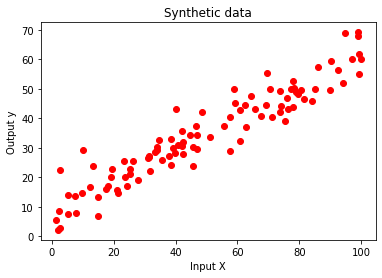

In [30]:
# Generate synthetic X/y data

# Generate 100 points x between 0 and 100
X = np.random.uniform(0,100,100).reshape(100,1)
# add column 1 to first column of X
X= np.concatenate((np.ones((100,1)),X),1)

# Generate the "noisy" values of y for each X
theta_true = np.array([[10],[0.5]])
y = X@theta_true + np.random.normal(0,5,(100,1))

# plot the data
plt.plot(X[:,1],y,'ro')                   
plt.title('Synthetic data')
plt.xlabel('Input X')
plt.ylabel('Output y')

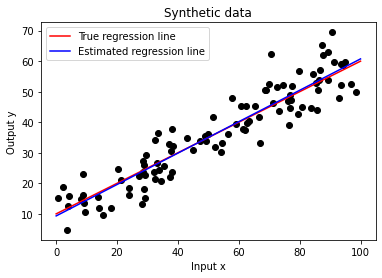

In [3]:
# Normal equation
theta_star = np.linalg.inv(X.T @ X) @ X.T @ y

# Plot result
plt.plot(X[:,1], y, 'ko')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.title('Synthetic data')

x1 = 0
x2 = 100
y1 = theta_true[0,0]
y2 = theta_true[0,0] + theta_true[1,0] * x2
plt.plot((x1, x2), (y1, y2), 'r-', label='True regression line')

y1 = theta_star[0,0]
y2 = theta_star[0,0] + theta_star[1,0] * x2
plt.plot((x1, x2), (y1, y2), 'b-', label='Estimated regression line')

plt.legend()
plt.show()

## EXERCISE 2

---
__Recall:__ "BATCH" Gradient descent for Linear Regression:
1. Arbitrary value $\theta^{0}$
2. For i to m :
    - Calculate $J(\theta)^{(i)}=\frac{1}{m}\ \sum_{i=1}^{m}(h_{\theta}(X)^{(i)}-y^{(i)})^2;$ 
    - Calculate $\nabla_{J}(\theta^{(i)})= \sum_{i=1}^{m}(h_{\theta}(X)^{(i)}-y^{(i)})X^{(i)}$
    - $\theta^{(i+1)} = \theta^{(i)} - \alpha\nabla_{J}(\theta^{(i)})$
---

Epoch 0: cost 1443.014660 grad[-3458.731413 , -212910.534113]
Epoch 10: cost 47.105051 grad[-291.006299 , -4195.657301]
Epoch 20: cost 46.551771 grad[-228.475965 , -79.366613]
Epoch 30: cost 46.541234 grad[-227.186545 , 1.814350]
Epoch 40: cost 46.530913 grad[-227.104938 , 3.414555]
Epoch 50: cost 46.520598 grad[-227.047165 , 3.445262]
Epoch 60: cost 46.510288 grad[-226.989877 , 3.445015]
Epoch 70: cost 46.499983 grad[-226.932612 , 3.444158]
Epoch 80: cost 46.489684 grad[-226.875363 , 3.443290]
Epoch 90: cost 46.479389 grad[-226.818127 , 3.442421]


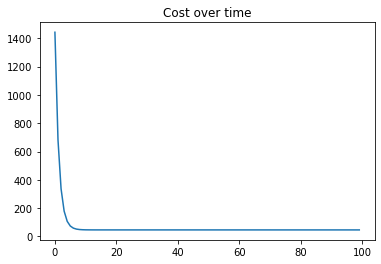

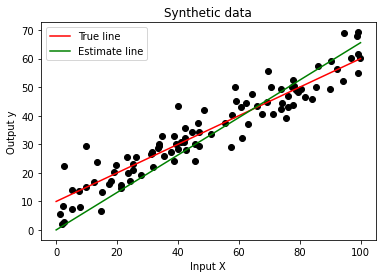

In [32]:
# "BATCH" Gradient descent

# Define a function to calculate J and grad_J
def gradient (X,y,theta):
    m = X.shape[0]
    n = theta.shape[0]
    y_hat = X@theta
    J = ((y_hat - y)*(y_hat - y)).sum()/m
    grad_J = np.zeros((n,1))
    for i in range(m):
        grad_J = grad_J + (y_hat[i,0] - y[i,0]) * X[i:i+1,0:].T
    return J, grad_J

alpha = 0.000001
theta = np.array([[0],[0]])
costs = []

for iter in range(100):
    cost, grad = gradient (X,y,theta)
    costs.append(cost)
    if iter%10 == 0:
        print('Epoch %d: cost %f grad[%f , %f]' % (iter, cost, grad[0],grad[1]))
    theta = theta - alpha * grad
theta_batch = theta

plt.plot (costs)
plt.title('Cost over time')
plt.show()

# plot the result
plt.plot(X[:,1],y,'ko')
plt.title('Synthetic data')
plt.xlabel('Input X')
plt.ylabel('Output y')

x1 = 0
x2 = 100

y1 = theta_true[0,0]
y2 = theta_true[0,0] + theta_true[1,0]*x2
plt.plot((x1,x2),(y1,y2),'r-',label='True line')


y1 = theta_batch[0,0]
y2 = theta_batch[0,0] + theta_batch[1,0]*x2
plt.plot((x1,x2),(y1,y2),'g-',label='Estimate line')

plt.legend()
plt.show()

## EXERCISE 3

---
__Recall:__ "STOCHASTIC" Gradient descent for Linear Regression:
1. Arbitrary value $\theta^{0}$
2. For j = 0 to m :
    - Sample $x^{(j)}, y^{(j)}$ from training set
    - Calculate $\nabla_{J}(\theta^{(j)})= (h_{\theta}(X)^{(j)}-y^{(j)})X^{(j)}$
    - $\theta^{(j+1)} = \theta^{(j)} - \alpha\nabla_{J}(\theta^{(j)})$
---

Epoch 0: cost 1443.014660
Epoch 1: cost 47.526323 grad[-1.348819 , -37.687874]
Epoch 2: cost 47.155817 grad[-1.710650 , -36.262236]
Epoch 3: cost 49.550379 grad[-8.638204 , -164.268985]
Epoch 4: cost 58.031156 grad[13.590061 , 1025.272619]
Epoch 5: cost 62.627085 grad[-16.814863 , -673.170829]
Epoch 6: cost 60.697487 grad[-0.124855 , -10.638725]
Epoch 7: cost 51.163637 grad[-7.363289 , -249.355787]
Epoch 8: cost 49.889665 grad[-0.124727 , -3.948221]
Epoch 9: cost 48.923447 grad[-1.877371 , -114.230060]
Epoch 10: cost 54.484535 grad[2.228726 , 222.423481]
Epoch 11: cost 55.221924 grad[10.794424 , 492.943607]
Epoch 12: cost 47.508162 grad[12.513810 , 1156.354264]
Epoch 13: cost 46.544133 grad[15.280064 , 1089.668663]
Epoch 14: cost 46.415023 grad[-7.291386 , -229.864772]
Epoch 15: cost 64.963634 grad[-1.022278 , -41.762892]
Epoch 16: cost 48.609749 grad[-2.203316 , -217.978768]
Epoch 17: cost 45.567145 grad[-8.002496 , -371.892532]
Epoch 18: cost 44.813806 grad[-3.296042 , -297.150188]
E

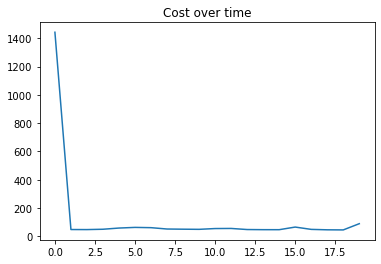

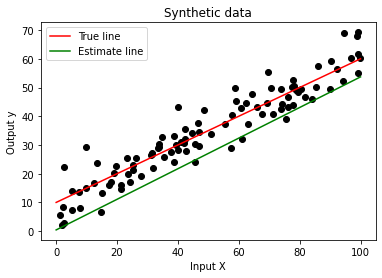

In [34]:
# "Stochastic" Gradient descent
m = X.shape[0]
alpha = 0.0001
theta = np.array([[0],[0]])
cost, _ = gradient(X,y, theta)
print('Epoch 0: cost %f' % (cost))
costs = [cost]

for epoch in range(1,20):
    order = np.arange(m)
    np.random.shuffle(order)
    for iter in range(m):
        i = order[iter]
        _, grad= gradient(X[i:i+1,:], y[i:i+1], theta)
        theta = theta - alpha * grad
    cost, _ = gradient(X,y, theta)
    costs.append(cost)
    print('Epoch %d: cost %f grad[%f , %f]' % (epoch, cost, grad[0],grad[1]))
theta_stoc = theta

plt.plot (costs)
plt.title('Cost over time')
plt.show()

# plot the result
plt.plot(X[:,1],y,'ko')
plt.title('Synthetic data')
plt.xlabel('Input X')
plt.ylabel('Output y')

x1 = 0
x2 = 100

y1 = theta_true[0,0]
y2 = theta_true[0,0] + theta_true[1,0]*x2
plt.plot((x1,x2),(y1,y2),'r-',label='True line')


y1 = theta_stoc[0,0]
y2 = theta_stoc[0,0] + theta_stoc[1,0]*x2
plt.plot((x1,x2),(y1,y2),'g-',label='Estimate line')

plt.legend()
plt.show()

## EXERCISE 4

In [229]:
from sklearn.preprocessing import PolynomialFeatures

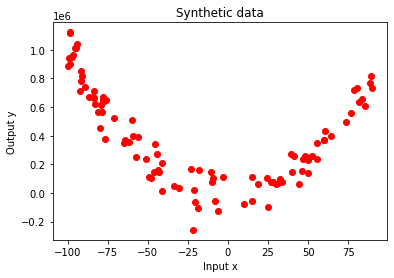

In [3]:
# Generate synthetic X/y data

# Generate 100 points x between -100 and 100
X = np.random.uniform(-100, 100, 100).reshape((100, 1))
X1 = np.concatenate((np.ones((100, 1)), X), 1)

X_expanded = np.concatenate((X1,X1[:,1:]**2),1)

# Suppose y = 13 - 25*X + 99*X**2
theta_true = [[13],[-25],[99]]

y = X_expanded @ theta_true + np.random.normal(0,100000,(100,1))

# Plot data
plt.plot(X1[:,1], y, 'ro')
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.title('Synthetic data')
plt.show()

In [7]:
# construct the prediction function
def poly_exp(X, y, degree):
    poly = PolynomialFeatures(degree)
    X_exp = poly.fit_transform(X)
    theta_star = np.linalg.inv(X_exp.T @ X_exp) @ X_exp.T @ y
    yhat = X_exp @ theta_star
    return theta_star, yhat

In [8]:
theta_star, yhat = poly_exp(X, y, 2)

[[-18354.53980296]
 [    34.17354038]
 [   101.72305824]]


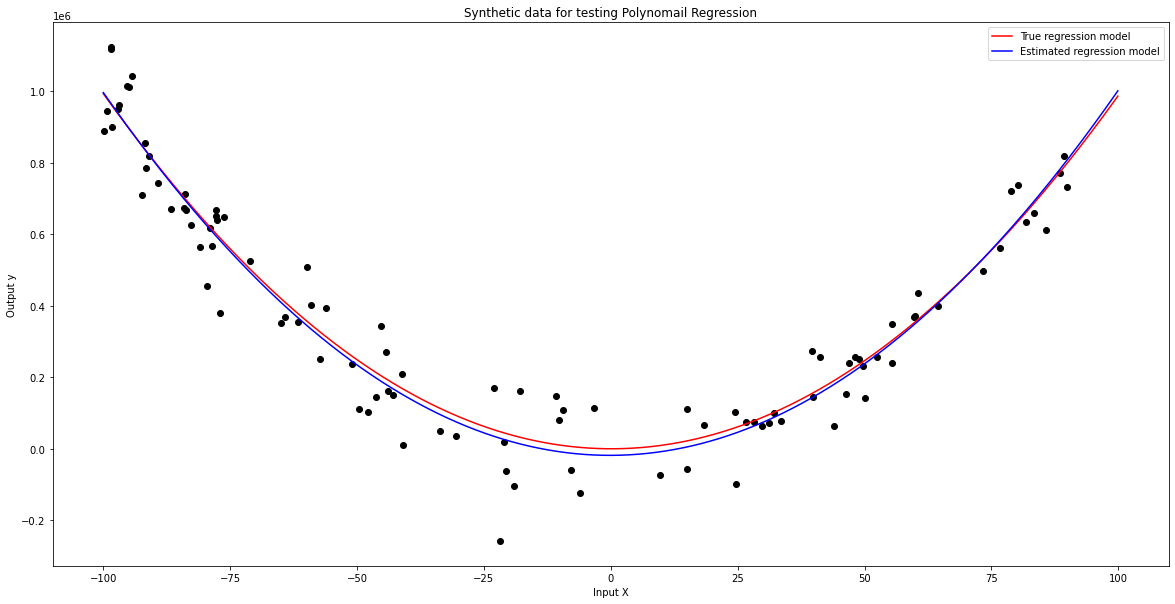

In [10]:
print(theta_star)
# Plot result
plt.figure(figsize=(20, 10))
X_plot = np.concatenate((np.ones((100, 1)), X), 1)
plt.plot(X_plot[:,1], y, 'ko')

x_plot = np.arange(-100, 100, 0.1).reshape((-1,1))
m_plot = x_plot.shape[0]
X_plot = np.concatenate((np.ones((m_plot, 1)), x_plot, x_plot * x_plot), 1)

y_plot = X_plot @ theta_true
plt.plot(x_plot, y_plot, 'r-', label='True regression model')

y_plot = X_plot @ theta_star
plt.plot(x_plot, y_plot, 'b-', label='Estimated regression model')


plt.legend()
plt.xlabel('Input X')
plt.ylabel('Output y')
plt.title('Synthetic data for testing Polynomail Regression')
plt.show()